In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib
from scipy.stats import shapiro
from scipy.stats import ttest_ind

Indonesia Inflation 2018 & 2019

In [10]:
df = pd.read_csv('inflasi_indo.csv')
df = df.drop(['Unnamed: 2'], axis=1)
#print(df)
df['split'] = df['Bulan Tahun'].str.split(" ")
df['Month'] = df.split.str.get(0).str[0:3]
df['Year'] = df.split.str.get(1)
month = df['Month'].tolist()
month_fix = []
for i in month:
    if i in ['Nop', 'Agu', 'Mei', 'Des', 'Okt']:
        if i == 'Nop':
            month_fix.append('Nov')
        if i == 'Agu':
            month_fix.append('Aug')
        if i == 'Mei':
            month_fix.append('May')
        if i == 'Des':
            month_fix.append('Dec')
        if i == 'Okt':
            month_fix.append('Oct')
    else:
        month_fix.append(i)
df['Month_fixed'] = pd.Series(month_fix)  
df['Date_fixed'] = df['Month_fixed'] + " " + df['Year']
#print(month_fix)
df['Date'] = pd.to_datetime(df['Date_fixed'], format='%b %Y')
df['month_year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df = df.drop(['Bulan Tahun', 'Month', 'Year', 'Month_fixed', 'Date_fixed', 'Date', 'split'], axis=1)
df.rename(columns={'month_year': 'Date', 'Persen':'Percentage'}, inplace=True)
df = df[['Date', 'Percentage']]
df['percentage_fixed'] = df['Percentage'].str.split(" ").str.get(0)
df = df.drop(['Percentage'], axis=1)
df.rename(columns={'percentage_fixed':'Percentage (%)'}, inplace=True)
df = df.sort_values(by=['Date'], ascending=True).reset_index(drop=True)
df['Percentage (%)'] = pd.to_numeric(df['Percentage (%)'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df_2018 = df.iloc[0:12].reset_index(drop=True)
df_2019 = df.iloc[12:].reset_index(drop=True)
df_pivot = df.pivot(columns='Month', index='Year', values='Percentage (%)').reset_index()
df_pivot_2 = df.pivot(columns='Year', index='Month', values='Percentage (%)').reset_index()
#print(df)
df_pivot

Month,Year,1,2,3,4,5,6,7,8,9,10,11,12
0,2018,3.25,3.18,3.40,3.41,3.23,3.12,3.18,3.20,2.88,3.16,3.23,3.13
1,2019,2.82,2.57,2.48,2.83,3.32,3.28,3.32,3.49,3.39,3.13,3.00,2.72


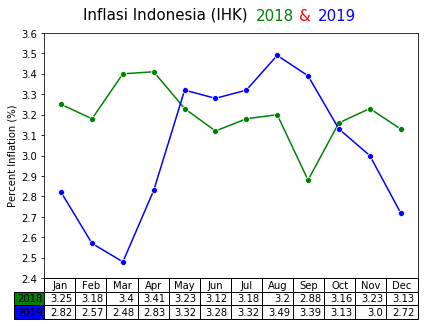

In [11]:
#lets visualize
df_list = df_pivot.drop(['Year'], axis=1).values.tolist()
columns = tuple(range(1, 13))
columns_2 = ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
rows = [2018, 2019]

#colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
#n_rows = len(df_list)

#index = np.arange(len(columns)) + 0.3
#bar_width = 0.4


#y_offset = np.zeros(len(columns))
#print(y_offset)

#cell_text = []
fig=plt.figure()
#plt.plot(range(1, 13), df_list[0], color='green', marker='o')
#plt.plot(range(1, 13), df_list[1], color='blue', marker='o')
sns.lineplot(range(1, 13), df_list[0], color='green', marker='o')
sns.lineplot(range(1, 13), df_list[1], color='blue', marker='o')
    #y_offset = y_offset + df_list[row]
    #cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
#colors = colors[::-1]
#cell_text.reverse()
#colors = sns.color_palette(palette='colorblind')
plt.table(cellText=df_list, colLabels=columns_2, rowColours=['green', 'blue'], rowLabels=rows, loc='bottom') #
#fig.suptitle('Inflasi Indonesia (IHK) 2018 & 2019', fontsize=15)
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel('Percent Inflation (%)')
plt.figtext(0.20, 0.96, "Inflasi Indonesia (IHK)", fontsize=15)
plt.figtext(0.60, 0.954, "2018", fontsize=15, color='g')
plt.figtext(0.70, 0.954, "&", fontsize=15, color='r')
plt.figtext(0.745, 0.954, "2019", fontsize=15, color='b')
plt.xticks([])
#plt.yticks([2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6])
plt.yticks(np.arange(2.4, 3.6, 0.1))
#plt.legend([2018, 2019], bbox_to_anchor=(-0.13, 0.06), loc="upper left", fontsize = 'x-small')
fig.tight_layout()
fig.subplots_adjust(top=0.91)
plt.savefig('res0.png', bbox_inches='tight')
plt.show()




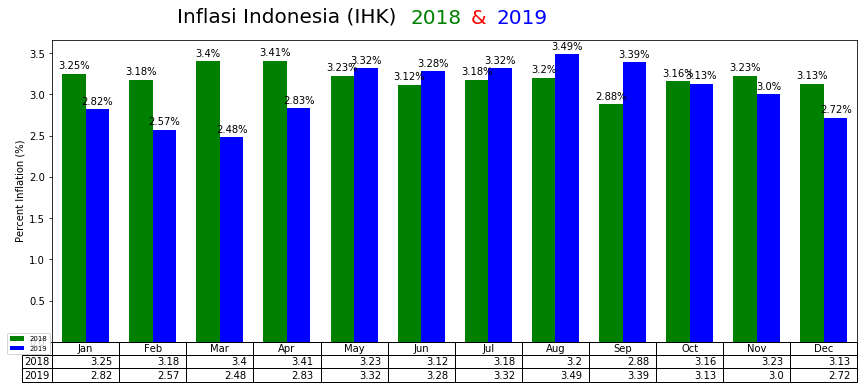

In [12]:
#side by side bar MoM
#the correct way
x = np.arange(len(df_2018))  # the label locations
width = 0.35
fig, ax = plt.subplots(figsize=(12,5))
rects1 = ax.bar(x - width/2, df_2018['Percentage (%)'], width, color='green')
rects2 = ax.bar(x + width/2, df_2019['Percentage (%)'], width, color='blue')
#ax.set_ylabel('Percent Inflation')
#ax.set_title('MoM (2018 & 2019)')
##ax.set_xticks(x)
#ax.set_xticklabels(df_2018['Month'])
#ax.legend()

plt.table(cellText=df_list, colLabels=columns_2, rowLabels=rows, loc='bottom')#, bbox=[0, -0.5, 1, 0.2]) 
plt.subplots_adjust(left=0.2, bottom=0.2)
plt.ylabel('Percent Inflation (%)')
plt.figtext(0.20, 0.96, "Inflasi Indonesia (IHK)", fontsize=20)
plt.figtext(0.47, 0.954, "2018", fontsize=20, color='g')
plt.figtext(0.54, 0.954, "&", fontsize=20, color='r')
plt.figtext(0.57, 0.954, "2019", fontsize=20, color='b')
plt.xticks([])
plt.xlim(-0.5,len(df_2018)-0.5)

plt.legend([2018, 2019], bbox_to_anchor=(-0.06, 0.04), loc="upper left", fontsize = 'x-small')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
fig.subplots_adjust(top=0.91)
plt.savefig('res.png', bbox_inches='tight')

plt.show()

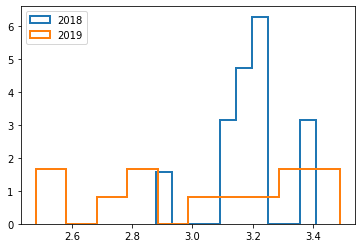

In [13]:
#histogram
plt.hist(df_2018['Percentage (%)'], density=True, histtype='step', linewidth=2)
plt.hist(df_2019['Percentage (%)'], density=True, histtype='step', linewidth=2)
plt.legend([2018, 2019])
plt.show()

In [14]:
#hipotesis testing

#normality test using shapiro-wilk
H0 = 'The data is normally distributed'   
def shapiro_wilk(data1, data2):
    norm = []
    for i in range(2):
        stat1, pval1 = shapiro(data1)
        stat2, pval2 = shapiro(data2)
        norm.append(pval1)
        norm.append(pval2)
    return norm[0], norm[1]

year_2018, year_2019 = shapiro_wilk(df['Percentage (%)'][0:12], df['Percentage (%)'][12:24])

def result_1():
    alpha = 0.05
    if year_2018 > alpha:
        print(f'2018 looks Gaussian (fail to reject H0)')
    elif year_2018< alpha:
        print('2018 does not look Gaussian (reject H0)')
    if year_2019 > alpha:
        print(f'2019 looks Gaussian (fail to reject H0)')
    elif year_2019 < alpha:
        print(f'2019 does not look Gaussian (reject H0)')
result_1()
#both data have gaussian distribution

2018 looks Gaussian (fail to reject H0)
2019 looks Gaussian (fail to reject H0)


In [15]:
#because the data is normally distributed, we use parametric testing
#2sample t-test
H0 = 'The sample distributions are equal'
tsta, pval = ttest_ind(df_2018['Percentage (%)'], df_2019['Percentage (%)'])
print(pval)
if pval > 0.05:
    print('Both data have equal distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')
#not significanly different

0.126346035308746
Both data have equal distribution (fail to reject H0)


Base on hipotehis testing, we know that inflation rate in Indonesia 2018 & 2019 shown no significant difference

This is probably because we only use 2 years of data

If we use ten years of data and compare it between the first year and the latest year, we might see a significant difference

Further analysis and hipothesis testing needed